In [ ]:
%matplotlib inline


UMAP on the MNIST Digits dataset
--------------------------------

A simple example demonstrating how to use UMAP on a larger
dataset such as MNIST. We first pull the MNIST dataset and
then use UMAP to reduce it to only 2-dimensions for
easy visualisation.

Note that UMAP manages to both group the individual digit
classes, but also to retain the overall global structure
among the different digit classes -- keeping 1 far from
0, and grouping triplets of 3,5,8 and 4,7,9 which can
blend into one another in some cases.



In [ ]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata("MNIST original")

ImportError: cannot import name 'fetch_mldata' from 'sklearn.datasets' (/usr/local/lib/python3.10/dist-packages/sklearn/datasets/__init__.py)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

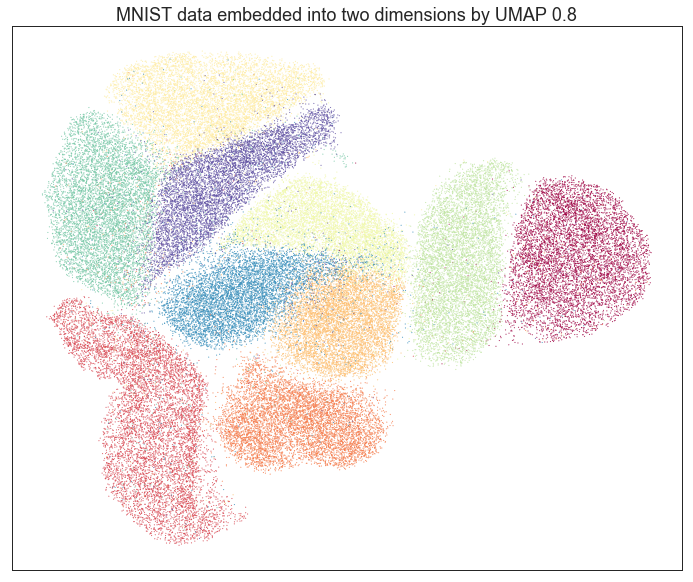

In [ ]:
import umap
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(context="paper", style="white")

reducer = umap.UMAP(random_state=42,min_dist=0.8)
embedding = reducer.fit_transform(mnist.data)

fig, ax = plt.subplots(figsize=(12, 10))
plt.scatter(
    embedding[:, 0], embedding[:, 1], c=mnist.target, cmap="Spectral", s=0.1
)
plt.setp(ax, xticks=[], yticks=[])
plt.title("MNIST data embedded into two dimensions by UMAP 0.8", fontsize=18)

plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

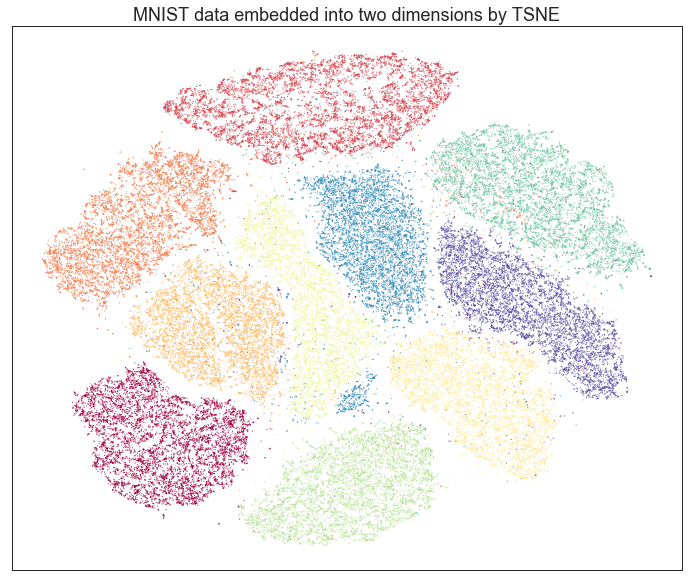

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(context="paper", style="white")

tsne = TSNE(n_components=2, random_state=0)
embedding = tsne.fit_transform(mnist.data)

fig, ax = plt.subplots(figsize=(12, 10))
plt.scatter(
    embedding[:, 0], embedding[:, 1], c=mnist.target, cmap="Spectral", s=0.1
)
plt.setp(ax, xticks=[], yticks=[])
plt.title("MNIST data embedded into two dimensions by TSNE", fontsize=18)

plt

In [ ]:
reducer = umap.UMAP(random_state=42,min_dist=0.8)
embedding = reducer.fit_transform(mnist.data)
import json
with open('min_dist_08_umap_mnist-embeddings.json', 'w') as outfile:
    json.dump(embedding.tolist(), outfile)

In [ ]:
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(mnist.data)
import json
with open('mnist-embeddings.json', 'w') as outfile:
    json.dump(embedding.tolist(), outfile)

In [ ]:
tsne = TSNE(n_components=2, random_state=0)
embedding = tsne.fit_transform(mnist.data)
import json
with open('tsne-mnist-embeddings.json', 'w') as outfile:
    json.dump(embedding.tolist(), outfile)

In [ ]:
import numpy as np
from mnist import MNIST

In [ ]:
mndata = MNIST('./fashion-mnist/data')
train, train_labels = mndata.load_training()
test, test_labels = mndata.load_testing()
data = np.array(np.vstack([train, test]), dtype=np.float64) / 255.0
target = np.hstack([train_labels, test_labels])
classes = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot']

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

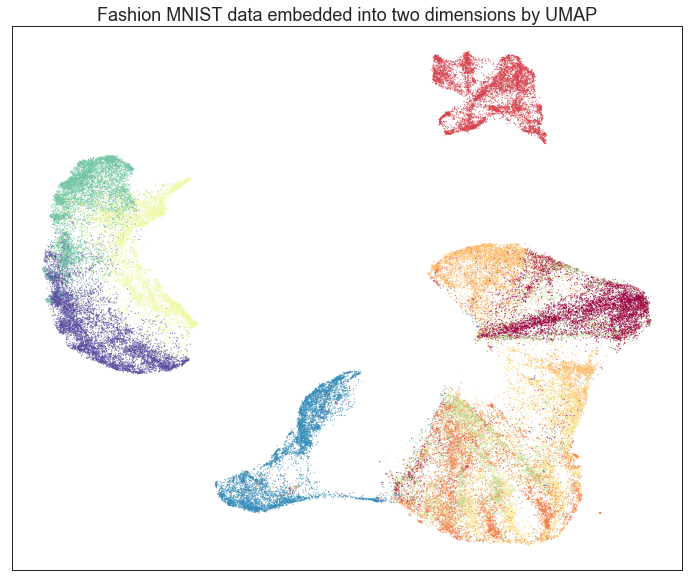

In [ ]:
import umap
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(context="paper", style="white")

reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(data)

fig, ax = plt.subplots(figsize=(12, 10))
plt.scatter(
    embedding[:, 0], embedding[:, 1], c=target, cmap="Spectral", s=0.1
)
plt.setp(ax, xticks=[], yticks=[])
plt.title("Fashion MNIST data embedded into two dimensions by UMAP", fontsize=18)

plt

In [ ]:
import pandas as pd
import os

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir("/content/drive/MyDrive/Images-dataset")


In [ ]:
!ls

test


In [ ]:
# Define the folder path
folder_path = '/content/drive/MyDrive/Images-dataset'  # Update this path accordingly

# Initialize a list to store image filenames
image_filenames = []

# Walk through each directory and file in the folder path
for root, dirs, files in os.walk(folder_path):
    for file in files:
        if file.endswith(('.png', '.jpg', '.jpeg')):  # Filter by image formats
            # Get the full path and add to the list
            file_path = os.path.join(root, file)
            image_filenames.append(file_path)

# Create a pandas DataFrame from the list of filenames
df_images = pd.DataFrame(image_filenames, columns=['File Path'])

# Display the DataFrame
print(df_images)

                                             File Path
0    /content/drive/MyDrive/Images-dataset/test/soy...
1    /content/drive/MyDrive/Images-dataset/test/soy...
2    /content/drive/MyDrive/Images-dataset/test/soy...
3    /content/drive/MyDrive/Images-dataset/test/soy...
4    /content/drive/MyDrive/Images-dataset/test/soy...
..                                                 ...
348  /content/drive/MyDrive/Images-dataset/test/tur...
349  /content/drive/MyDrive/Images-dataset/test/tur...
350  /content/drive/MyDrive/Images-dataset/test/tur...
351  /content/drive/MyDrive/Images-dataset/test/tur...
352  /content/drive/MyDrive/Images-dataset/test/tur...

[353 rows x 1 columns]


In [ ]:
import os
import numpy as np
import pandas as pd
import umap
import matplotlib.pyplot as plt
from PIL import Image
from skimage.feature import hog  # For feature extraction from images
from skimage.color import rgb2gray
import seaborn as sns

sns.set(context="paper", style="white")



In [ ]:
# Function to extract HOG features from images
# Function to extract HOG features from images
def extract_features_from_image(image_path):
    image = Image.open(image_path).convert('RGB')  # Convert image to RGB if it's RGBA
    image = image.resize((64, 64))  # Resize images for uniformity
    image = np.array(image)  # Convert image to numpy array

    # Convert the image to grayscale
    image_gray = rgb2gray(image)

    # Extract HOG features
    features, hog_image = hog(image_gray, pixels_per_cell=(16, 16),
                              cells_per_block=(2, 2), visualize=True)

    return features


# Define the folder path
folder_path = '/content/drive/MyDrive/Images-dataset/test'

# Initialize lists to store image filenames and extracted features
image_filenames = []
image_features = []

# Iterate over the image files in the dataset and extract features
for root, dirs, files in os.walk(folder_path):
    for file in files:
        if file.endswith(('.png', '.jpg', '.jpeg')):
            file_path = os.path.join(root, file)
            image_filenames.append(file_path)

            # Extract features and append to the list
            features = extract_features_from_image(file_path)
            image_features.append(features)

# Convert image features into a DataFrame or NumPy array
image_features = np.array(image_features)


KeyboardInterrupt: 

In [ ]:
# Apply UMAP to the image features
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(image_features)

# Convert the embeddings into a DataFrame for easy manipulation
embedding_df = pd.DataFrame(embedding, columns=['UMAP1', 'UMAP2'])
embedding_df['image'] = image_filenames  # Add image filenames to the DataFrame


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


UMAP

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
import umap.umap_ as umap
import plotly.graph_objects as go
import ipywidgets as widgets
from ipywidgets import interact, fixed
import matplotlib.offsetbox as offsetbox

In [ ]:
image_folder = '/content/drive/My Drive/Images-dataset'
image_files = os.listdir(image_folder)

In [ ]:
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, target_size)
    image = preprocess_input(image)
    return image

def extract_features(model, images):
    return model.predict(np.array(images))


In [ ]:
for image_files in image_files:
    category_path = os.path.join(image_folder, image_files)
    if os.path.isdir(category_path):  # Check if it's a directory
        image_files = os.listdir(category_path)

        # Display the first image in the category
        if len(image_files) > 0:
            image_path = os.path.join(category_path, image_files[0])
            image = cv2.imread(image_path)  # Read the image
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

            plt.figure(figsize=(5, 5))
            plt.imshow(image)
            plt.title(f'{image_files} - Image 1')
            plt.axis('off')
            plt.show()

In [ ]:
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, target_size)
    image = preprocess_input(image)
    return image

def extract_features(model, images):
    return model.predict(np.array(images))


In [ ]:
dataset_folder = '/content/drive/My Drive/Images-dataset/test'
categories = os.listdir(dataset_folder)
model = ResNet50(weights='imagenet', include_top=False, pooling='avg')


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
image_data = []
labels = []

for category in categories:
    category_path = os.path.join(dataset_folder, category)
    if os.path.isdir(category_path):
        image_files = os.listdir(category_path)
        for image_file in image_files:
            image_path = os.path.join(category_path, image_file)
            image = load_and_preprocess_image(image_path)
            image_data.append(image)
            labels.append(category)

# Extract features using ResNet50
features = extract_features(model, image_data)


12/12 ━━━━━━━━━━━━━━━━━━━━ 74s 6s/step


In [ ]:
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
embedding = reducer.fit_transform(features)


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1394: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


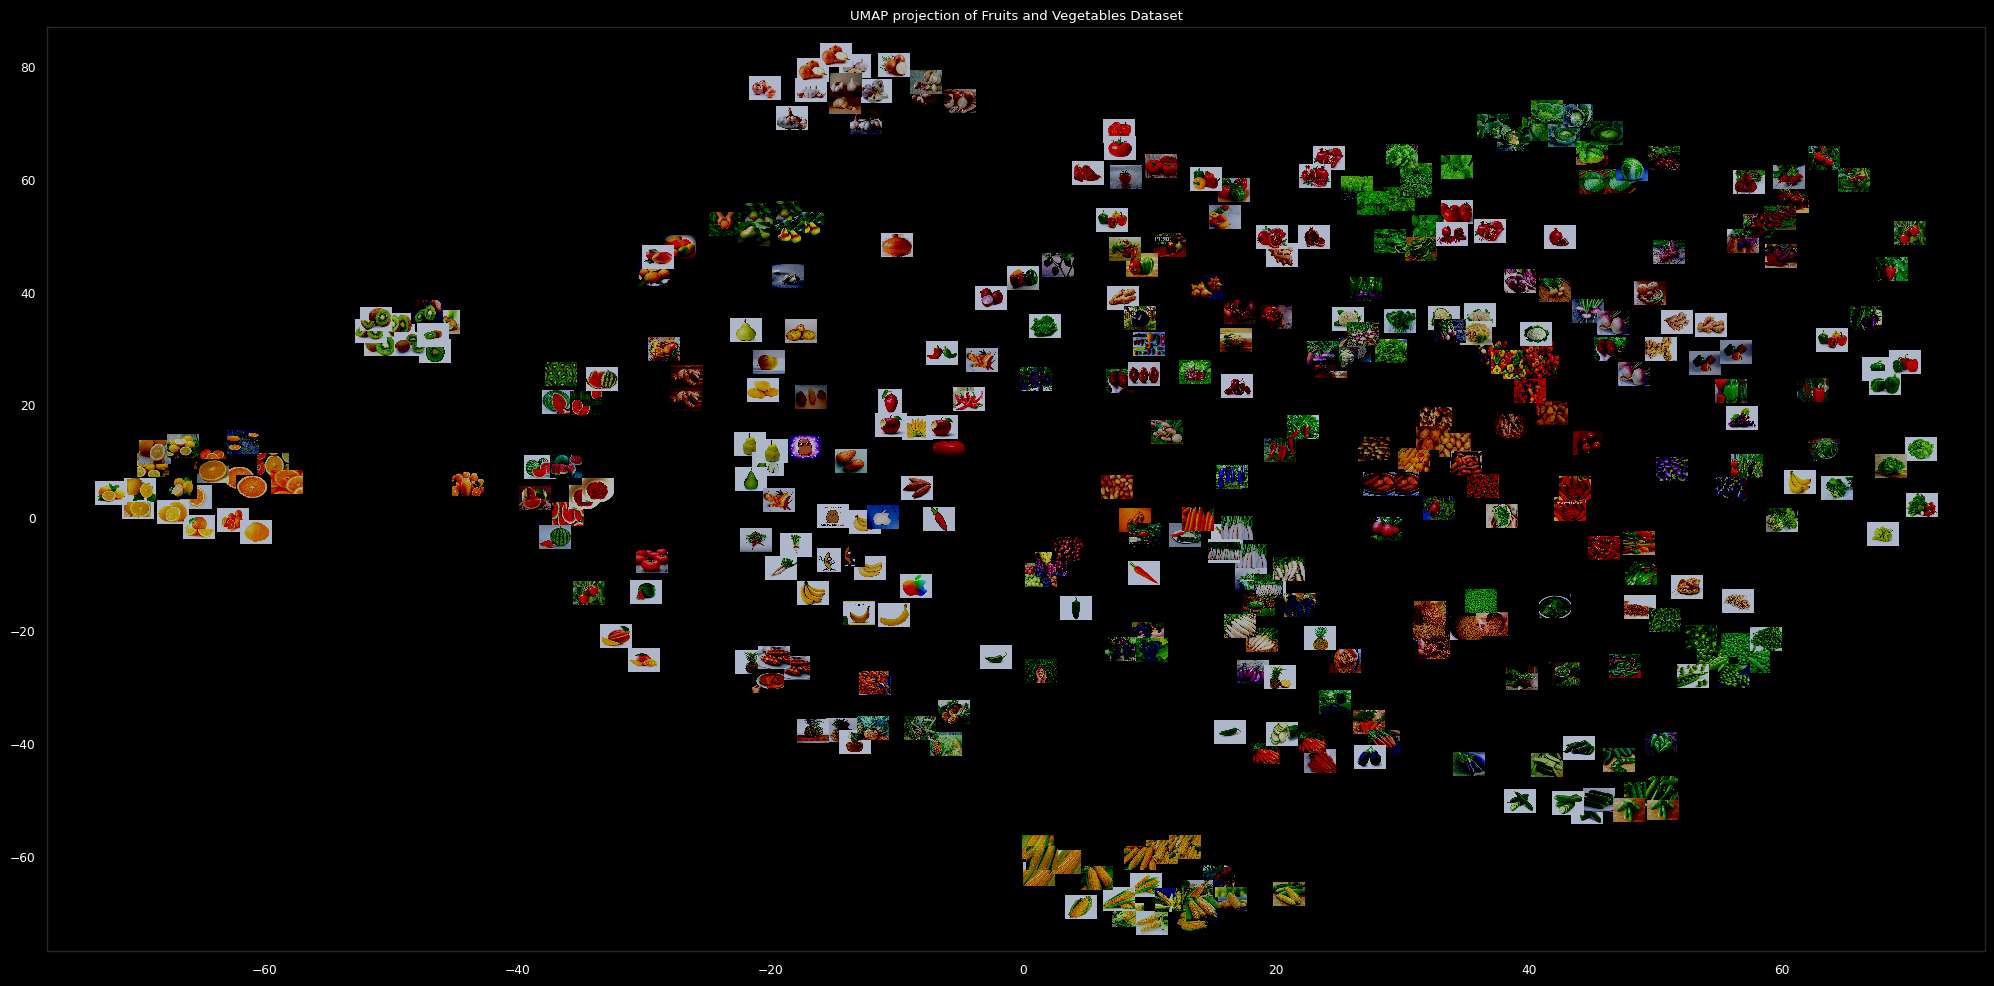

In [ ]:
import matplotlib.offsetbox as offsetbox
import numpy as np
import cv2

# Helper function to adjust brightness
def increase_brightness(img, value=30):
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)  # Convert to HSV for better brightness control
    h, s, v = cv2.split(hsv)
    v = cv2.add(v, value)  # Increase brightness by adding to the V channel
    v = np.clip(v, 0, 255)  # Ensure values stay within the correct range
    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2RGB)  # Convert back to RGB
    return img

# Helper function to draw images on the plot with a black background
def plot_with_images(X, images, zoom=0.7):  # Keep the zoom level as is for clarity
    fig, ax = plt.subplots(figsize=(25,12))
    fig.patch.set_facecolor('black')  # Set the figure's background to black
    ax.set_facecolor('black')  # Set the axes' background to black
    ax.set_xlim(X[:, 0].min() - 5, X[:, 0].max() + 5)
    ax.set_ylim(X[:, 1].min() - 5, X[:, 1].max() + 5)

    for i in range(X.shape[0]):
        img = images[i]
        img = increase_brightness(img, value=50)  # Increase brightness by 50 units

        if img.dtype != np.uint8:
            img = np.uint8(np.clip(img, 0, 255))  # Clip values and convert to uint8
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

        imagebox = offsetbox.AnnotationBbox(
            offsetbox.OffsetImage(img, zoom=zoom),
            X[i],
            frameon=False
        )
        ax.add_artist(imagebox)

    ax.set_title('UMAP projection of Fruits and Vegetables Dataset', color='white')  # Set title color to white
    ax.tick_params(axis='both', colors='white')  # Set the tick labels color to white
    plt.show()

# Adjust UMAP parameters for more spacing between clusters
reducer = umap.UMAP(n_neighbors=15, min_dist=0.3, spread=35.0, random_state=42)
embedding = reducer.fit_transform(features)

# Prepare images for display
thumbnails = []
for image in image_data:
    img_resized = cv2.resize(image, (32, 24))  # Use larger thumbnails for better clarity
    thumbnails.append(img_resized)

# Plot UMAP with images
plot_with_images(embedding, thumbnails)


## Train Dataset

In [ ]:
import os
os.chdir("/content/drive/MyDrive/train-dataset/train")

In [ ]:
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, target_size)
    image = preprocess_input(image)
    return image

def extract_features(model, images):
    return model.predict(np.array(images))


In [ ]:
dataset_folder = '/content/drive/My Drive/train-dataset/train'
categories = os.listdir(dataset_folder)
model = ResNet50(weights='imagenet', include_top=False, pooling='avg')


In [ ]:
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
embedding = reducer.fit_transform(features)


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [ ]:
import os
import cv2
import numpy as np
from tensorflow.keras.applications.resnet50 import preprocess_input
from multiprocessing import Pool

def load_and_preprocess_image(image_path, target_size=(224, 224)):
    """Load and preprocess a single image."""
    image = cv2.imread(image_path)

    if image is None:
        print(f"Error loading image: {image_path}")
        return None

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, target_size)
    image = preprocess_input(image)
    return image

def process_images_in_batch(image_files_batch):
    """Process a batch of images in parallel."""
    processed_images = []
    for image_path in image_files_batch:
        processed_image = load_and_preprocess_image(image_path)
        if processed_image is not None:
            processed_images.append(processed_image)
    return processed_images

def load_images_in_batches(dataset_folder, batch_size=100, target_size=(224, 224)):
    """Load images from the dataset in batches."""
    categories = os.listdir(dataset_folder)
    image_paths = []
    labels = []

    # Collect all image paths and their labels
    for category in categories:
        category_path = os.path.join(dataset_folder, category)
        if os.path.isdir(category_path):
            image_files = os.listdir(category_path)
            for image_file in image_files:
                image_path = os.path.join(category_path, image_file)
                image_paths.append(image_path)
                labels.append(category)

    # Load images in batches using multiprocessing
    total_images = len(image_paths)
    num_batches = (total_images + batch_size - 1) // batch_size
    all_processed_images = []

    with Pool() as pool:
        for i in range(num_batches):
            start = i * batch_size
            end = min(start + batch_size, total_images)
            batch = image_paths[start:end]

            print(f"Processing batch {i+1}/{num_batches}...")
            batch_result = pool.apply_async(process_images_in_batch, [batch])
            all_processed_images.extend(batch_result.get())

    return np.array(all_processed_images), labels

# Now proceed with extracting features using ResNet50 (assuming you have a model ready)
features = extract_features(model, image_data)


68/68 ━━━━━━━━━━━━━━━━━━━━ 426s 6s/step


In [ ]:
reducer = umap.UMAP(n_neighbors=20, min_dist=0.01, random_state=42)
embedding = reducer.fit_transform(features)


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1394: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


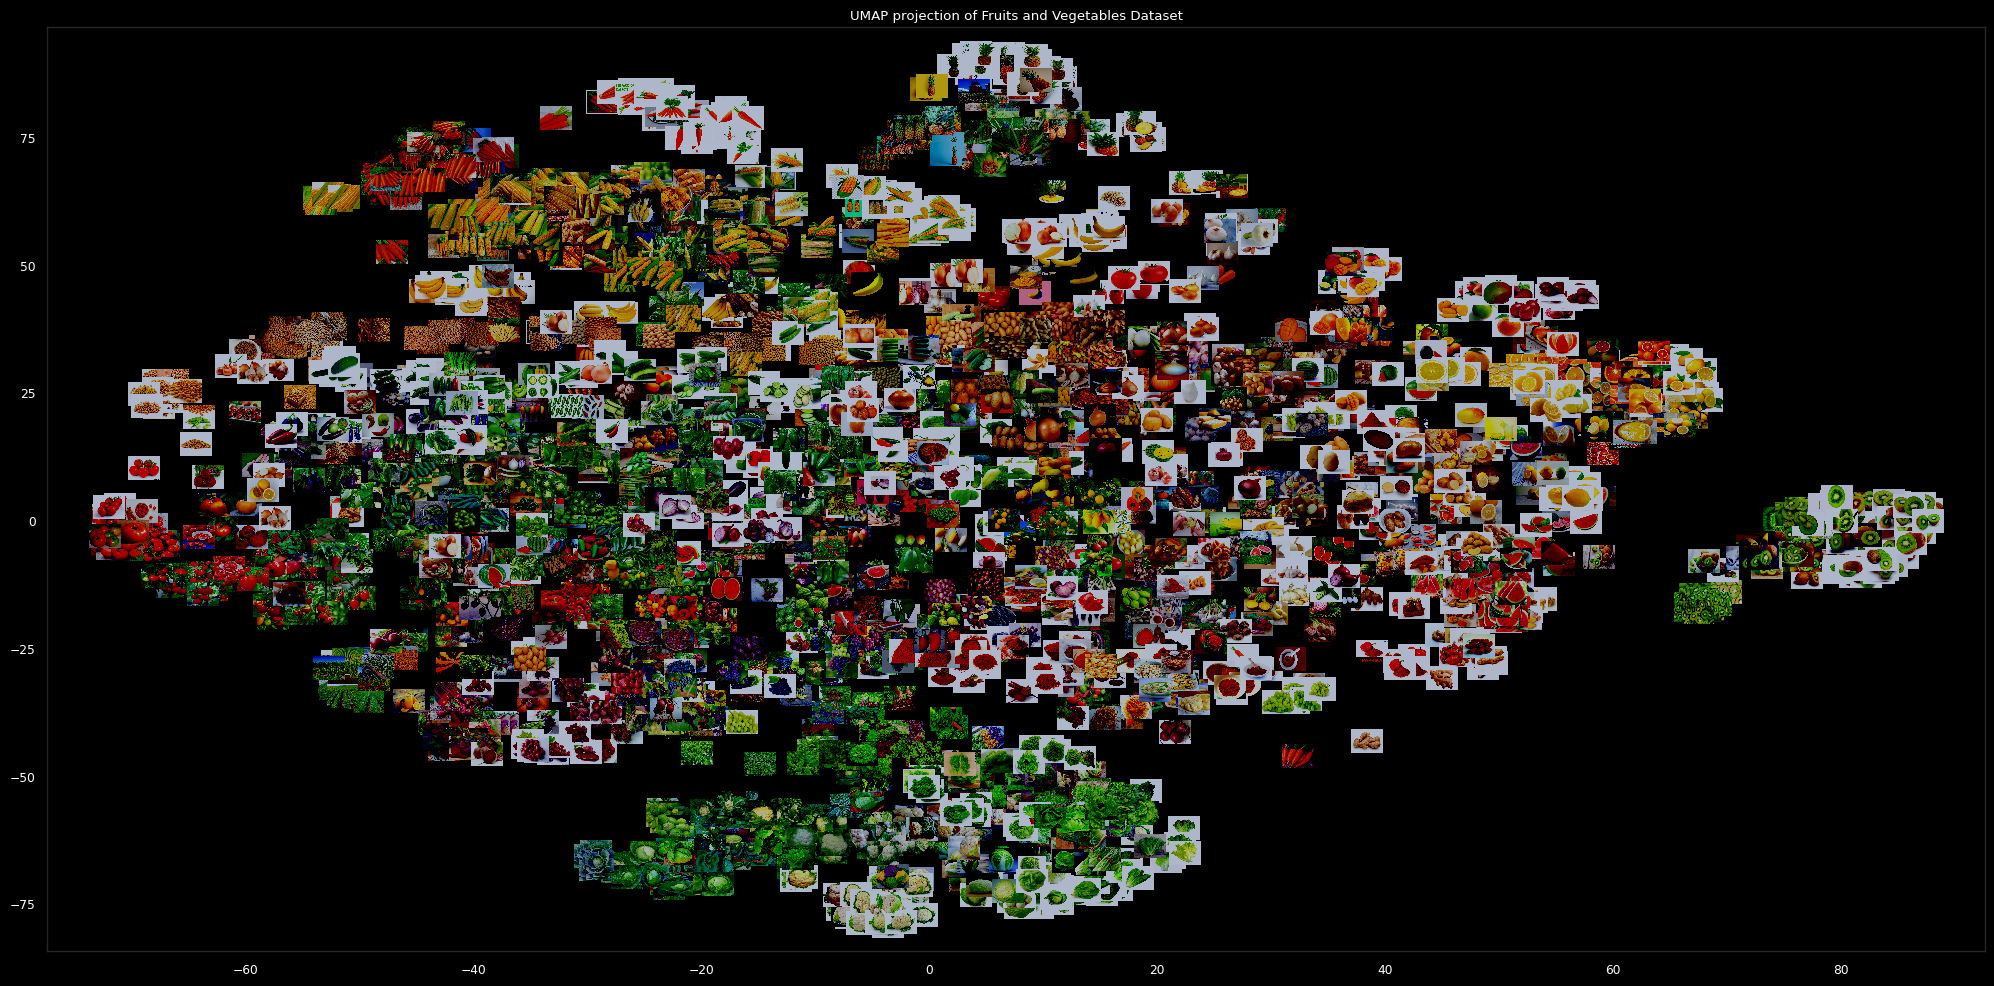

In [ ]:
import matplotlib.offsetbox as offsetbox
import numpy as np
import cv2

# Helper function to adjust brightness
def increase_brightness(img, value=30):
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)  # Convert to HSV for better brightness control
    h, s, v = cv2.split(hsv)
    v = cv2.add(v, value)  # Increase brightness by adding to the V channel
    v = np.clip(v, 0, 255)  # Ensure values stay within the correct range
    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2RGB)  # Convert back to RGB
    return img

# Helper function to draw images on the plot with a black background
def plot_with_images(X, images, zoom=0.7):  # Keep the zoom level as is for clarity
    fig, ax = plt.subplots(figsize=(25,12))
    fig.patch.set_facecolor('black')  # Set the figure's background to black
    ax.set_facecolor('black')  # Set the axes' background to black
    ax.set_xlim(X[:, 0].min() - 5, X[:, 0].max() + 5)
    ax.set_ylim(X[:, 1].min() - 5, X[:, 1].max() + 5)

    for i in range(X.shape[0]):
        img = images[i]
        img = increase_brightness(img, value=50)  # Increase brightness by 50 units

        if img.dtype != np.uint8:
            img = np.uint8(np.clip(img, 0, 255))  # Clip values and convert to uint8
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

        imagebox = offsetbox.AnnotationBbox(
            offsetbox.OffsetImage(img, zoom=zoom),
            X[i],
            frameon=False
        )
        ax.add_artist(imagebox)

    ax.set_title('UMAP projection of Fruits and Vegetables Dataset', color='white')  # Set title color to white
    ax.tick_params(axis='both', colors='white')  # Set the tick labels color to white
    plt.show()

# Adjust UMAP parameters for more spacing between clusters
reducer = umap.UMAP(n_neighbors=15, min_dist=0.3, spread=35.0, random_state=42)
embedding = reducer.fit_transform(features)

# Prepare images for display
thumbnails = []
for image in image_data:
    img_resized = cv2.resize(image, (32, 24))  # Use larger thumbnails for better clarity
    thumbnails.append(img_resized)

# Plot UMAP with images
plot_with_images(embedding, thumbnails)
